In [167]:
import sys
sys.path.append('utils')
import os


In [168]:
import scanpy as sc

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import anndata
import geopandas as gpd

from stardist.models import StarDist2D

from tifffile import imread, imwrite
from csbdeep.utils import normalize
from shapely.geometry import Polygon, Point
from scipy import sparse
from matplotlib.colors import ListedColormap

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [170]:
gdf = gpd.read_file('../data/xenium/voronoi_buffered.geojson')

In [171]:
gdf['id'] = [f"ID_{i+1}" for i, _ in enumerate(gdf.index)]

In [172]:
gdf

geometry         id
0       POLYGON ((30749.94918 1038.64866, 30736.32127 ...       ID_1
1       POLYGON ((10.20950 5714.60840, 39.10178 5688.5...       ID_2
2       POLYGON ((9.37544 5719.60340, -2363.26992 5705...       ID_3
3       POLYGON ((30613.02689 185.33140, 30628.78077 1...       ID_4
4       POLYGON ((30677.50089 133.60364, 32969.24100 1...       ID_5
...                                                   ...        ...
216318  POLYGON ((10176.21595 8010.96427, 10154.48016 ...  ID_216319
216319  POLYGON ((10160.23161 7976.64806, 10134.61157 ...  ID_216320
216320  POLYGON ((10166.62656 7970.23116, 10178.41003 ...  ID_216321
216321  POLYGON ((10188.87301 8002.16873, 10225.24661 ...  ID_216322
216322  POLYGON ((10188.30265 8007.22056, 10181.43227 ...  ID_216323

[216323 rows x 2 columns]

In [173]:
adata = sc.read_h5ad('../data/xenium/outs/transcripts_anndata_final.h5ad')

In [174]:
adata_df = adata.to_df()

In [175]:
adata_df.index

Index(['(0, 1376)', '(0, 1400)', '(0, 1402)', '(0, 1415)', '(0, 1425)',
       '(0, 1429)', '(0, 1431)', '(0, 1434)', '(0, 1437)', '(0, 1438)',
       ...
       '(2201, 133)', '(2201, 135)', '(2201, 137)', '(2201, 138)',
       '(2201, 140)', '(2201, 146)', '(2201, 147)', '(2201, 148)',
       '(2201, 153)', '(2201, 154)'],
      dtype='object', name='bin', length=3204769)

In [176]:
adata.obs

sample       start_x       start_y         end_x         end_y   
bin                                                                            
(0, 1376)    sample1   5977.914968  19691.259132   5987.326733  19700.670896  \
(0, 1400)    sample1   5977.914968  19917.141485   5987.326733  19926.553249   
(0, 1402)    sample1   5977.914968  19935.965014   5987.326733  19945.376779   
(0, 1415)    sample1   5977.914968  20058.317955   5987.326733  20067.729720   
(0, 1425)    sample1   5977.914968  20152.435602   5987.326733  20161.847367   
...              ...           ...           ...           ...           ...   
(2201, 146)  sample1  26693.209086   8114.788543  26702.620851   8124.200308   
(2201, 147)  sample1  26693.209086   8124.200308  26702.620851   8133.612073   
(2201, 148)  sample1  26693.209086   8133.612073  26702.620851   8143.023838   
(2201, 153)  sample1  26693.209086   8180.670896  26702.620851   8190.082661   
(2201, 154)  sample1  26693.209086   8190.082661  26702.620851   8199.494426   

                 center_x      center_y  n_genes_by_counts   
bin                                                          
(0, 1376)     5982.620851  19695.965014                  1  \
(0, 1400)     5982.620851  19921.847367                  1   
(0, 1402)     5982.620851  19940.670896                  2   
(0, 1415)     5982.620851  20063.023838                  1   
(0, 1425)     5982.620851  20157.141485                  1   
...                   ...           ...                ...   
(2201, 146)  26697.914968   8119.494426                  2   
(2201, 147)  26697.914968   8128.906190                  1   
(2201, 148)  26697.914968   8138.317955                  1   
(2201, 153)  26697.914968   8185.376779                  1   
(2201, 154)  26697.914968   8194.788543                  1   

             log1p_n_genes_by_counts  total_counts  log1p_total_counts   
bin                                                                      
(0, 1376)                   0.693147             1            0.693147  \
(0, 1400)                   0.693147             1            0.693147   
(0, 1402)                   1.098612             2            1.098612   
(0, 1415)                   0.693147             1            0.693147   
(0, 1425)                   0.693147             1            0.693147   
...                              ...           ...                 ...   
(2201, 146)                 1.098612             2            1.098612   
(2201, 147)                 0.693147             1            0.693147   
(2201, 148)                 0.693147             1            0.693147   
(2201, 153)                 0.693147             1            0.693147   
(2201, 154)                 0.693147             1            0.693147   

             pct_counts_in_top_50_genes  pct_counts_in_top_100_genes   
bin                                                                    
(0, 1376)                         100.0                        100.0  \
(0, 1400)                         100.0                        100.0   
(0, 1402)                         100.0                        100.0   
(0, 1415)                         100.0                        100.0   
(0, 1425)                         100.0                        100.0   
...                                 ...                          ...   
(2201, 146)                       100.0                        100.0   
(2201, 147)                       100.0                        100.0   
(2201, 148)                       100.0                        100.0   
(2201, 153)                       100.0                        100.0   
(2201, 154)                       100.0                        100.0   

             pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  
bin                                                                    
(0, 1376)                          100.0                        100.0  
(0, 1400)                          100.0          

In [177]:
df_tissue_positions = adata_df
# Create an index in the dataframe to check joins
df_tissue_positions['index']=df_tissue_positions.index

In [178]:
df_tissue_positions.shape

(3204769, 542)

In [179]:
# Create a GeoDataFrame from the DataFrame of coordinates
geometry = [Point(xy) for xy in zip(adata.obs['center_x'], adata.obs['center_y'])]
gdf_coordinates = gpd.GeoDataFrame(df_tissue_positions, geometry=geometry)

In [180]:
gdf.crs = None

In [181]:
result_spatial_join = gpd.sjoin(gdf_coordinates, gdf, how='left', predicate='within')

In [117]:
result_spatial_join.shape

(3204769, 545)

In [182]:
result_spatial_join[result_spatial_join['index_right'].isna()]

ABCC11  ACTA2  ACTG2  ADAM9  ADGRE5  ADH1B  ADIPOQ  AGR3  AHSP   
bin                                                                           
(0, 1431)         0      0      0      0       0      0       0     0     0  \
(0, 1434)         0      0      0      0       0      0       0     0     0   
(0, 1438)         0      0      0      0       0      0       0     0     0   
(0, 1461)         0      1      0      0       0      0       0     0     0   
(0, 1478)         0      0      0      0       0      0       0     0     0   
...             ...    ...    ...    ...     ...    ...     ...   ...   ...   
(2201, 100)       0      0      0      0       0      0       0     0     0   
(2201, 114)       0      0      0      0       0      0       0     0     0   
(2201, 117)       0      0      0      0       0      0       0     0     0   
(2201, 118)       0      0      0      0       0      0       0     0     0   
(2201, 121)       0      0      0      0       0      0       0     0     0   

             AIF1  ...  antisense_LGI3  antisense_MYLIP  antisense_PROKR2   
bin                ...                                                      
(0, 1431)       0  ...               0                0                 0  \
(0, 1434)       0  ...               0                0                 0   
(0, 1438)       0  ...               0                0                 0   
(0, 1461)       0  ...               0                0                 0   
(0, 1478)       0  ...               0                0                 0   
...           ...  ...             ...              ...               ...   
(2201, 100)     0  ...               0                0                 0   
(2201, 114)     0  ...               0                0                 0   
(2201, 117)     0  ...               0                0                 0   
(2201, 118)     0  ...               0                0                 0   
(2201, 121)     0  ...               0                0                 0   

             antisense_SCRIB  antisense_TRMU  antisense_ULK3        index   
bin                                                                         
(0, 1431)                  0               0               0    (0, 1431)  \
(0, 1434)                  0               0               0    (0, 1434)   
(0, 1438)                  0               0               0    (0, 1438)   
(0, 1461)                  0               0               0    (0, 1461)   
(0, 1478)                  0               0               0    (0, 1478)   
...                      ...             ...             ...          ...   
(2201, 100)                0               0               0  (2201, 100)   
(2201, 114)                0               0               0  (2201, 114)   
(2201, 117)                0               0               0  (2201, 117)   
(2201, 118)                0               0               0  (2201, 118)   
(2201, 121)                0               0               0  (2201, 121)   

                               geometry  index_right   id  
bin                                                        
(0, 1431)    POINT (5982.621 20213.612)          NaN  NaN  
(0, 1434)    POINT (5982.621 20241.847)          NaN  NaN  
(0, 1438)    POINT (5982.621 20279.494)          NaN  NaN  
(0, 1461)    POINT (5982.621 20495.965)          NaN  NaN  
(0, 1478)    POINT (5982.621 20655.965)          NaN  NaN  
...                                 ...          ...  ...  
(2201, 100)  POINT (26697.915 7686.553)          NaN  NaN  
(2201, 114)  POINT (26697.915 7818.318)          NaN  NaN  
(2201, 117)  POINT (26697.915 7846.553)          NaN  NaN  
(2201, 118)  POINT (26697.915 7855.965)          NaN  NaN  
(2201, 121)  POINT (26697.915 7884.200)          NaN  NaN  

[632090 rows x 545 columns]

In [183]:
# Identify nuclei associated barcodes and find barcodes that are in more than one nucleus
result_spatial_join['is_within_polygon'] = ~result_spatial_join['index_right'].isna()

In [184]:
# Remove barcodes in overlapping nuclei
barcodes_in_one_polygon = result_spatial_join[result_spatial_join['is_within_polygon']==True]


In [185]:
barcodes_in_one_polygon.shape

(2572679, 546)

In [186]:
# Convert the tuples in barcodes_in_one_polygon['index'] to strings
barcodes_in_one_polygon['index'] = barcodes_in_one_polygon['index'].apply(lambda x: str(x))

# If you want to remove the 'bin' index name and set it as a regular column
barcodes_in_one_polygon.reset_index(inplace=True, drop=True)
print(barcodes_in_one_polygon['index'].head())
barcodes_in_one_polygon['index']

0    (0, 1376)
1    (0, 1400)
2    (0, 1402)
3    (0, 1415)
4    (0, 1425)
Name: index, dtype: object


geodataframe.py (1528): 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0            (0, 1376)
1            (0, 1400)
2            (0, 1402)
3            (0, 1415)
4            (0, 1425)
              ...     
2572674    (2201, 146)
2572675    (2201, 147)
2572676    (2201, 148)
2572677    (2201, 153)
2572678    (2201, 154)
Name: index, Length: 2572679, dtype: object

In [109]:
#barcodes_in_one_polygon.set_index('index', inplace=True)
#barcodes_in_one_polygon['index'] = barcodes_in_one_polygon.index

In [187]:
barcodes_in_overlaping_polygons = pd.unique(result_spatial_join[result_spatial_join.duplicated(subset=['index'])]['index'])
result_spatial_join['is_not_in_an_polygon_overlap'] = ~result_spatial_join['index'].isin(barcodes_in_overlaping_polygons)

# Remove barcodes in overlapping nuclei
barcodes_in_one_polygon = result_spatial_join[result_spatial_join['is_within_polygon'] & result_spatial_join['is_not_in_an_polygon_overlap']]

In [188]:
# The AnnData object is filtered to only contain the barcodes that are in non-overlapping polygon regions
filtered_obs_mask = adata.obs_names.isin(barcodes_in_one_polygon['index'])

In [189]:
filtered_adata = adata[filtered_obs_mask,:]

In [190]:
filtered_adata

View of AnnData object with n_obs × n_vars = 2572679 × 541
    obs: 'sample', 'start_x', 'start_y', 'end_x', 'end_y', 'center_x', 'center_y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'end_x', 'end_y', 'spatial', 'start_x', 'start_y'

In [191]:
print(f"Length of filtered_adata.obs: {len(filtered_adata.obs)}")
print(f"Length of barcodes_in_one_polygon: {len(barcodes_in_one_polygon)}")

Length of filtered_adata.obs: 2572679
Length of barcodes_in_one_polygon: 2572679


In [192]:
print(filtered_adata.obs.index[:5])  # Print first few indices from filtered_adata.obs
print(barcodes_in_one_polygon['index'][:5])  # Print first few indices from barcodes_in_one_polygon

Index(['(0, 1376)', '(0, 1400)', '(0, 1402)', '(0, 1415)', '(0, 1425)'], dtype='object', name='bin')
bin
(0, 1376)    (0, 1376)
(0, 1400)    (0, 1400)
(0, 1402)    (0, 1402)
(0, 1415)    (0, 1415)
(0, 1425)    (0, 1425)
Name: index, dtype: object


In [193]:

# Add the results of the point spatial join to the Anndata object
filtered_adata.obs =  pd.merge(filtered_adata.obs, barcodes_in_one_polygon[['index','geometry', 'id', 'is_within_polygon','is_not_in_an_polygon_overlap']], left_index=True, right_index=True)


In [131]:
# Group the data by unique nucleous IDs
groupby_object = filtered_adata.obs.groupby(['id'], observed=True)

In [194]:
# Extract the gene expression counts from the AnnData object
counts = filtered_adata.X

# Obtain the number of unique nuclei and the number of genes in the expression data
N_groups = groupby_object.ngroups
N_genes = counts.shape[1]

# Initialize a sparse matrix to store the summed gene counts for each nucleus
summed_counts = sparse.lil_matrix((N_groups, N_genes))

# Lists to store the IDs of polygons and the current row index
polygon_id = []
row = 0

# Iterate over each unique polygon to calculate the sum of gene counts.
for polygons, idx_ in groupby_object.indices.items():
    summed_counts[row] = counts[idx_].sum(0)
    row += 1
    polygon_id.append(polygons)

# Create and AnnData object from the summed count matrix
summed_counts = summed_counts.tocsr()
grouped_filtered_adata = anndata.AnnData(X=summed_counts,obs=pd.DataFrame(polygon_id,columns=['id'],index=polygon_id),var=filtered_adata.var)

%store grouped_filtered_adata


Stored 'grouped_filtered_adata' (AnnData)


In [195]:
grouped_filtered_adata

AnnData object with n_obs × n_vars = 115366 × 541
    obs: 'id'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [196]:
grouped_filtered_adata.write("../data/xenium/grouped_filtered_voronoi_adata_buffered.h5ad")

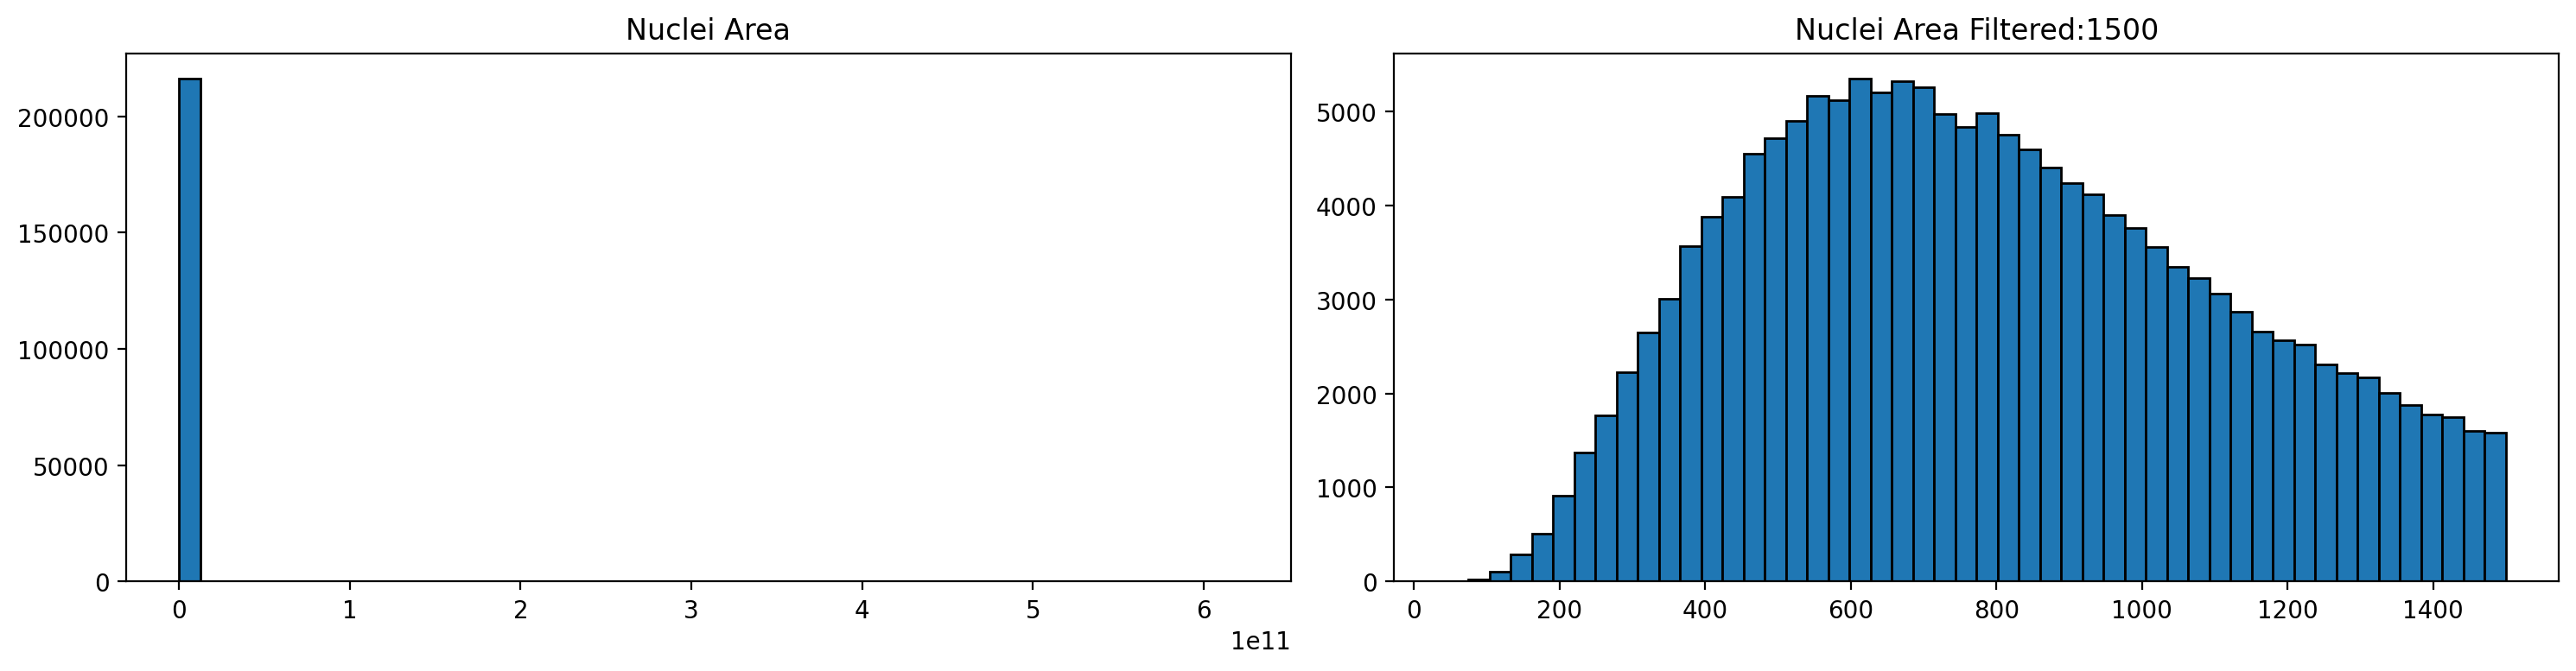

In [197]:
import sys
sys.path.append('../src/utils')
import os

import importlib
import image_plot_utils

# Reload the module
importlib.reload(image_plot_utils)

# Now try importing the function again
from image_plot_utils import plot_nuclei_area

# Store the area of each nucleus in the GeoDataframe
gdf['area'] = gdf['geometry'].area

# Calculate quality control metrics for the original AnnData object
sc.pp.calculate_qc_metrics(grouped_filtered_adata, inplace=True)

# Plot the nuclei area distribution before and after filtering
plot_nuclei_area(gdf=gdf,area_cut_off=1500)

In [198]:
# Create a mask based on the 'id' column for values present in 'gdf' with 'area' less than 500
mask_area = grouped_filtered_adata.obs['id'].isin(gdf[(gdf['area'] < 3000)].id)

# Create a mask based on the 'total_counts' column for values greater than 100
#ask_count = grouped_filtered_adata.obs['total_counts'] > 100

# Apply both masks to the original AnnData to create a new filtered AnnData object
count_area_filtered_adata = grouped_filtered_adata[mask_area, :]

# Calculate quality control metrics for the filtered AnnData object
sc.pp.calculate_qc_metrics(count_area_filtered_adata, inplace=True)


_qc.py (141): Trying to modify attribute `.obs` of view, initializing view as actual.


In [137]:
count_area_filtered_adata

AnnData object with n_obs × n_vars = 138592 × 541
    obs: 'id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [199]:
 # Normalize total counts for each cell in the AnnData object
sc.pp.normalize_total(count_area_filtered_adata, inplace=True)

# Logarithmize the values in the AnnData object after normalization
sc.pp.log1p(count_area_filtered_adata)

# Identify highly variable genes in the dataset using the Seurat method
sc.pp.highly_variable_genes(count_area_filtered_adata, flavor="seurat", n_top_genes=2000)

# Perform Principal Component Analysis (PCA) on the AnnData object
sc.pp.pca(count_area_filtered_adata)

# Build a neighborhood graph based on PCA components
sc.pp.neighbors(count_area_filtered_adata)

# Perform Leiden clustering on the neighborhood graph and store the results in 'clusters' column

# Adjust the resolution parameter as needed for different samples
sc.tl.leiden(count_area_filtered_adata, resolution=0.4, key_added="clusters")


_index.py (146): Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.


In [61]:
import imageio

# Load the image
img = imageio.imread('../data/xenium/Xenium_FFPE_Human_Breast_Cancer_Rep1_he_image.ome.tif')

268951726.py (4): Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


In [200]:
gdf.crs = None

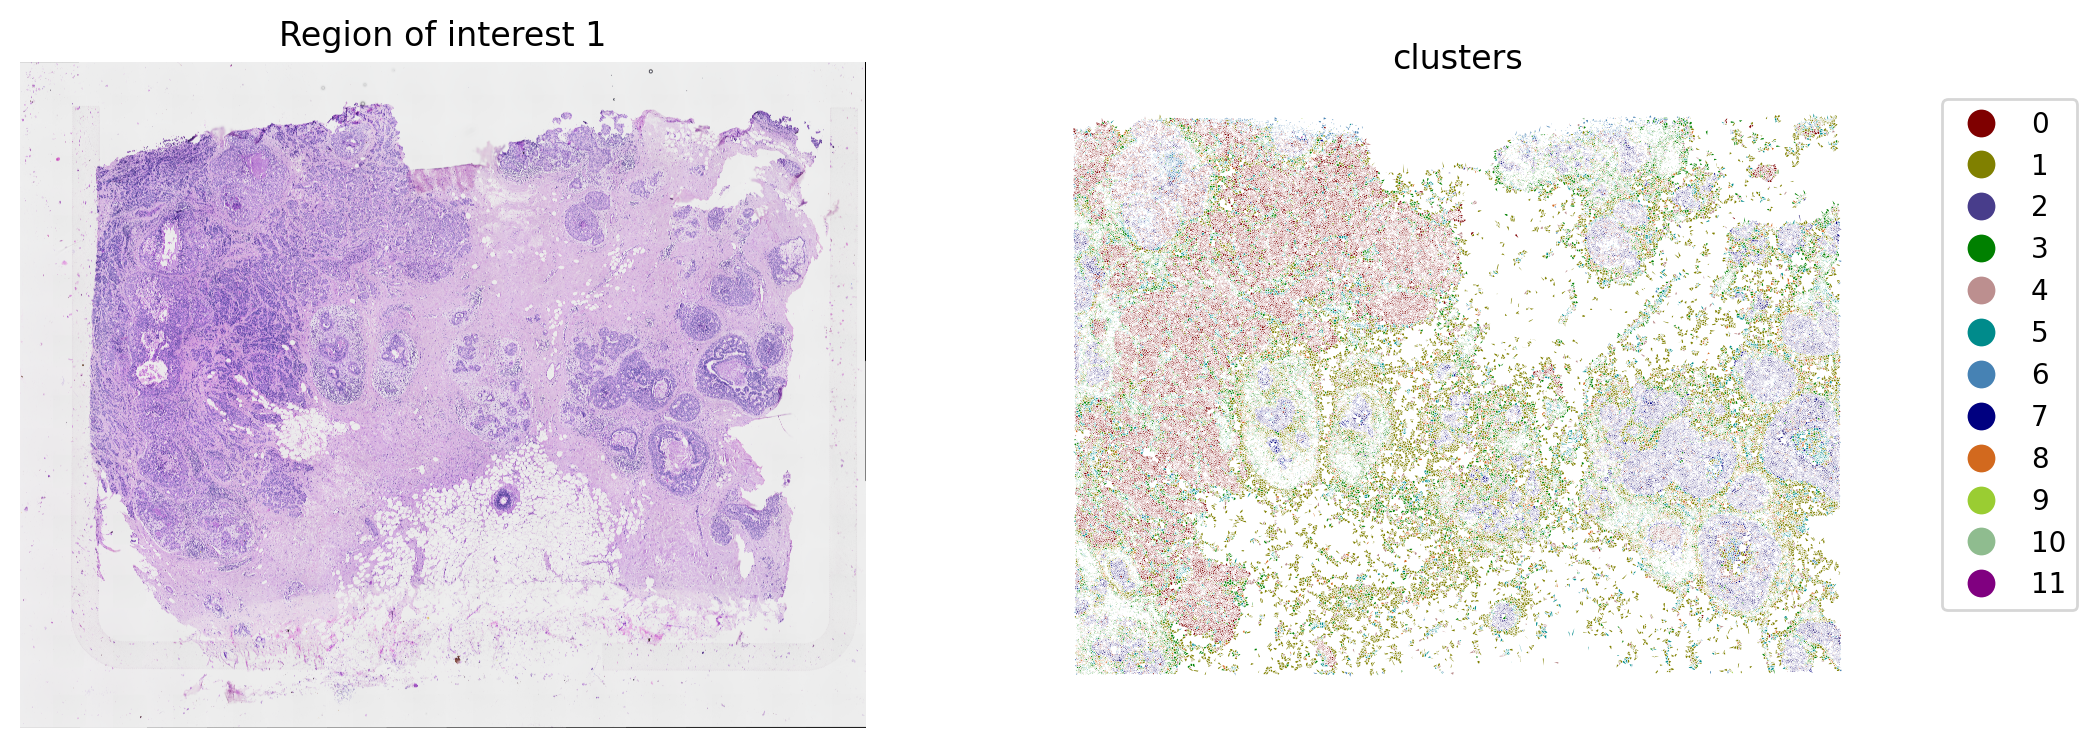

In [64]:
from image_plot_utils import plot_clusters_and_save_image
importlib.reload(image_plot_utils)
# Plot and save the clustering results
plot_clusters_and_save_image(title="Region of interest 1", gdf=gdf, img=img, adata=count_area_filtered_adata, color_by_obs='clusters', output_name="image_clustering.ROI1.tiff")

In [201]:
merged_gdf = gdf.merge(count_area_filtered_adata.obs['clusters'].astype('category'), left_on='id', right_index=True)

<Axes: >

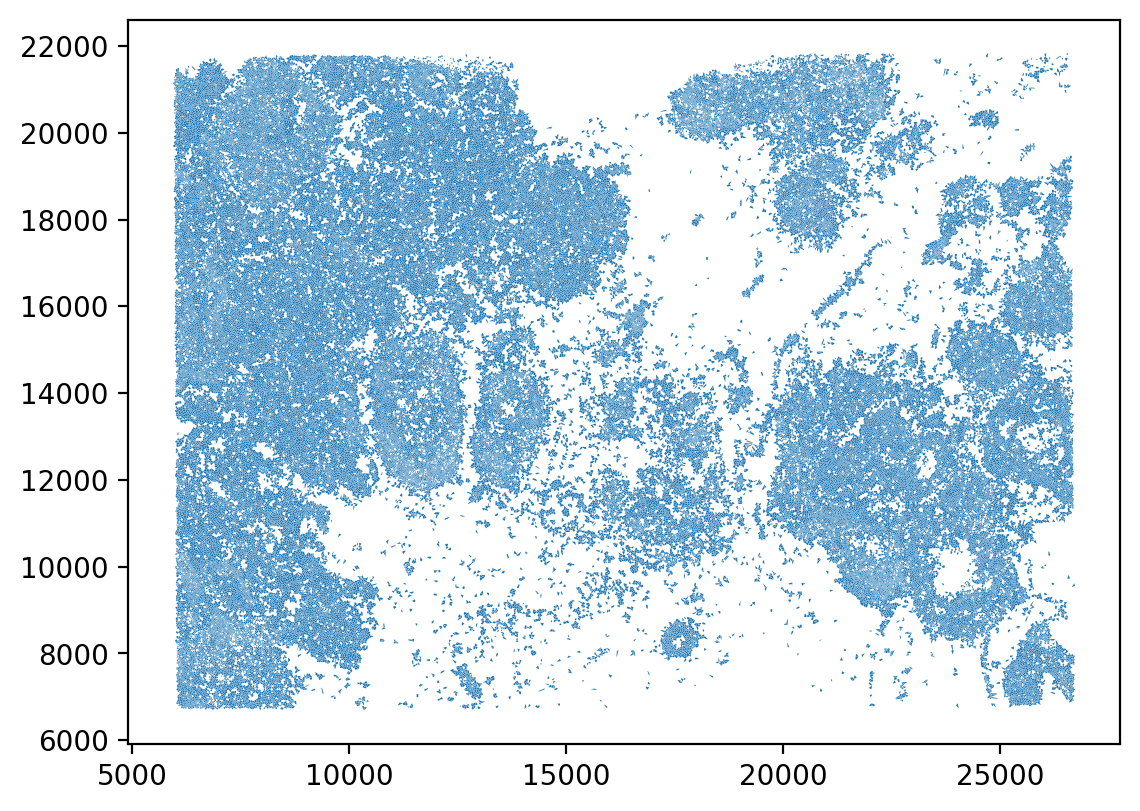

In [202]:
merged_gdf.plot()

In [203]:
merged_gdf_no_clusters = merged_gdf.drop(columns=['clusters'])

In [204]:
merged_gdf_no_clusters.to_file("../data/xenium/outs/clusters/data_cells_voronoi_merged_cosine_buffered.geojson", driver='GeoJSON')

In [205]:
count_area_filtered_adata.write("../data/xenium/outs/clusters/count_area_filtered_adata_voronoi_buffered.h5ad")

# Save cluster assignments
count_area_filtered_adata.obs[['clusters']].to_csv("../data/xenium/outs/clusters/cluster_assignments_voronoi_leiden_buffered.csv")

# Save GeoDataFrame
gdf.to_file("../data/xenium/outs/clusters/data_cells_voronoi_buffered.geojson", driver='GeoJSON')

In [70]:
merged_gdf_no_clusters

geometry         id   
716     POLYGON ((25917.582 21353.060, 25924.823 21374...     ID_717  \
1025    POLYGON ((17258.137 15674.601, 17258.687 15675...    ID_1026   
1026    POLYGON ((13356.165 15440.273, 13353.261 15477...    ID_1027   
1027    POLYGON ((18089.532 17650.065, 18004.139 17736...    ID_1028   
1029    POLYGON ((10316.999 20462.392, 10302.344 20463...    ID_1030   
...                                                   ...        ...   
216318  POLYGON ((10166.478 8014.318, 10154.878 8008.2...  ID_216319   
216319  POLYGON ((10127.206 8002.332, 10146.361 7989.9...  ID_216320   
216320  POLYGON ((10161.757 7964.171, 10168.602 7954.7...  ID_216321   
216321  POLYGON ((10192.990 7994.364, 10219.423 7992.5...  ID_216322   
216322  POLYGON ((10190.709 8014.571, 10187.343 8016.6...  ID_216323   

               area  
716      225.297763  
1025    1953.193226  
1026     792.415603  
1027     959.310922  
1029     251.799614  
...             ...  
216318   104.741275  
216319   411.808612  
216320   176.599078  
216321   584.755351  
216322  1822.895642  

[112725 rows x 3 columns]

<Axes: >

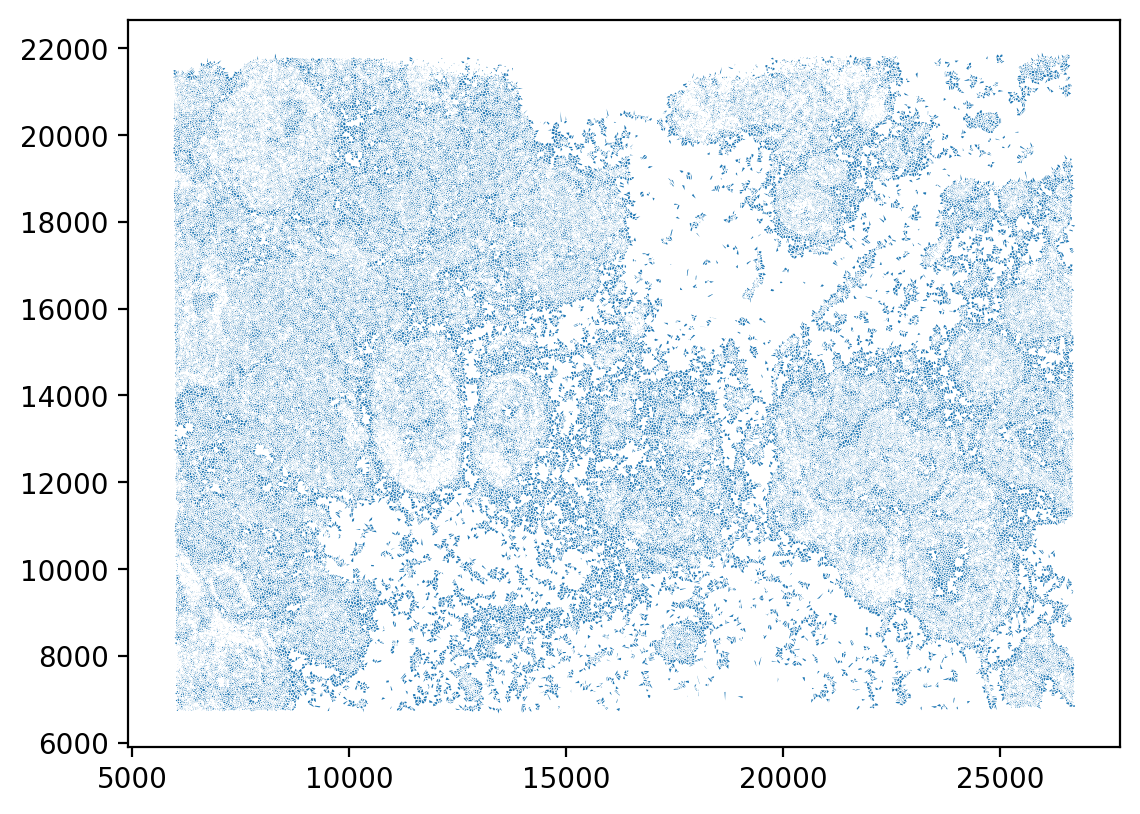

In [71]:
merged_gdf_no_clusters.plot()

In [206]:
import sys
sys.path.append('../src/utils')
import os

# Importing importlib for module reloading
import importlib
import image_cropp_utils

# Reloading the module
importlib.reload(image_cropp_utils)

from image_cropp_utils import load_dataframe

In [207]:
cells_data = load_dataframe('../data/xenium/outs/cells.parquet')

In [208]:
cells_data

cell_id   x_centroid   y_centroid  transcript_counts   
0             1   847.259912   326.191365                 28  \
1             2   826.341995   328.031830                 94   
2             3   848.766919   331.743187                  9   
3             4   824.228409   334.252643                 11   
4             5   841.357538   332.242505                 48   
...         ...          ...          ...                ...   
167775   167776  7455.475342  5114.875415                229   
167776   167777  7483.727051  5111.477490                 79   
167777   167778  7470.159424  5119.132056                397   
167778   167779  7477.737207  5128.712817                117   
167779   167780  7489.376562  5123.197778                378   

        control_probe_counts  control_codeword_counts  total_counts   
0                          1                        0            29  \
1                          0                        0            94   
2                          0                        0             9   
3                          0                        0            11   
4                          0                        0            48   
...                      ...                      ...           ...   
167775                     1                        0           230   
167776                     0                        0            79   
167777                     0                        0           397   
167778                     0                        0           117   
167779                     0                        0           378   

         cell_area  nucleus_area  
0        58.387031     26.642188  
1       197.016719     42.130781  
2        16.256250     12.688906  
3        42.311406     10.069844  
4       107.652500     37.479688  
...            ...           ...  
167775  220.452813     60.599688  
167776   37.389375     25.242344  
167777  287.058281     86.700000  
167778  235.354375     25.197188  
167779  270.079531    111.806875  

[167780 rows x 9 columns]

In [209]:
transform_matrix = np.array([
    [1.7125010585876286, 0.008345081015717404, -10397.19948741904],
    [0.008345081015717404, -1.7125010585876286, 37211.538978661185],
    [0, 0, 1]
])

# Get the inverse matrix
transform_matrix_inv = np.linalg.inv(transform_matrix)

# Extract coordinates and apply scaling
coords = cells_data[['x_centroid', 'y_centroid']].values
micron_to_pixel = 0.2125  # Microns per pixel
coords_scaled = coords / micron_to_pixel

# Function to transform coordinates
def transform_coordinates(coords, transform_matrix):
    coords = np.hstack((coords, np.ones((len(coords), 1))))
    transformed_coords = np.dot(transform_matrix, coords.T).T
    # Return only the x and y coordinates
    return transformed_coords[:, :2]

# Apply the transformation to the scaled coordinates
transformed_coords = transform_coordinates(coords_scaled, transform_matrix_inv)

# Update the DataFrame with the transformed coordinates
cells_data[['x_location_transformed', 'y_location_transformed']] = transformed_coords

In [210]:
from shapely.geometry import Polygon, Point
# Create a GeoDataFrame from cells_data
geometry = [Point(xy) for xy in zip(cells_data['x_location_transformed'], cells_data['y_location_transformed'])]
cells_gdf = gpd.GeoDataFrame(cells_data, geometry=geometry)
cells_gdf.crs = None

In [148]:
cells_gdf

cell_id   x_centroid   y_centroid  transcript_counts   
0             1   847.259912   326.191365                 28  \
1             2   826.341995   328.031830                 94   
2             3   848.766919   331.743187                  9   
3             4   824.228409   334.252643                 11   
4             5   841.357538   332.242505                 48   
...         ...          ...          ...                ...   
167775   167776  7455.475342  5114.875415                229   
167776   167777  7483.727051  5111.477490                 79   
167777   167778  7470.159424  5119.132056                397   
167778   167779  7477.737207  5128.712817                117   
167779   167780  7489.376562  5123.197778                378   

        control_probe_counts  control_codeword_counts  total_counts   
0                          1                        0            29  \
1                          0                        0            94   
2                          0                        0             9   
3                          0                        0            11   
4                          0                        0            48   
...                      ...                      ...           ...   
167775                     1                        0           230   
167776                     0                        0            79   
167777                     0                        0           397   
167778                     0                        0           117   
167779                     0                        0           378   

         cell_area  nucleus_area  x_location_transformed   
0        58.387031     26.642188             8297.871957  \
1       197.016719     42.130781             8240.416393   
2        16.256250     12.688906             8302.087393   
3        42.311406     10.069844             8234.691783   
4       107.652500     37.479688             8281.733889   
...            ...           ...                     ...   
167775  220.452813     60.599688            26520.667780   
167776   37.389375     25.242344            26598.254969   
167777  287.058281     86.700000            26561.075074   
167778  235.354375     25.197188            26582.026307   
167779  270.079531    111.806875            26613.936167   

        y_location_transformed                    geometry  
0                 20873.427800  POINT (8297.872 20873.428)  
1                 20868.090296  POINT (8240.416 20868.090)  
2                 20858.192164  POINT (8302.087 20858.192)  
3                 20850.967862  POINT (8234.692 20850.968)  
4                 20856.720876  POINT (8281.734 20856.721)  
...                        ...                         ...  
167775             7803.121686  POINT (26520.668 7803.122)  
167776             7812.837128  POINT (26598.255 7812.837)  
167777             7791.621519  POINT (26561.075 7791.622)  
167778             7765.396076  POINT (26582.026 7765.396)  
167779             7780.706674  POINT (26613.936 7780.707)  

[167780 rows x 12 columns]

<Axes: >

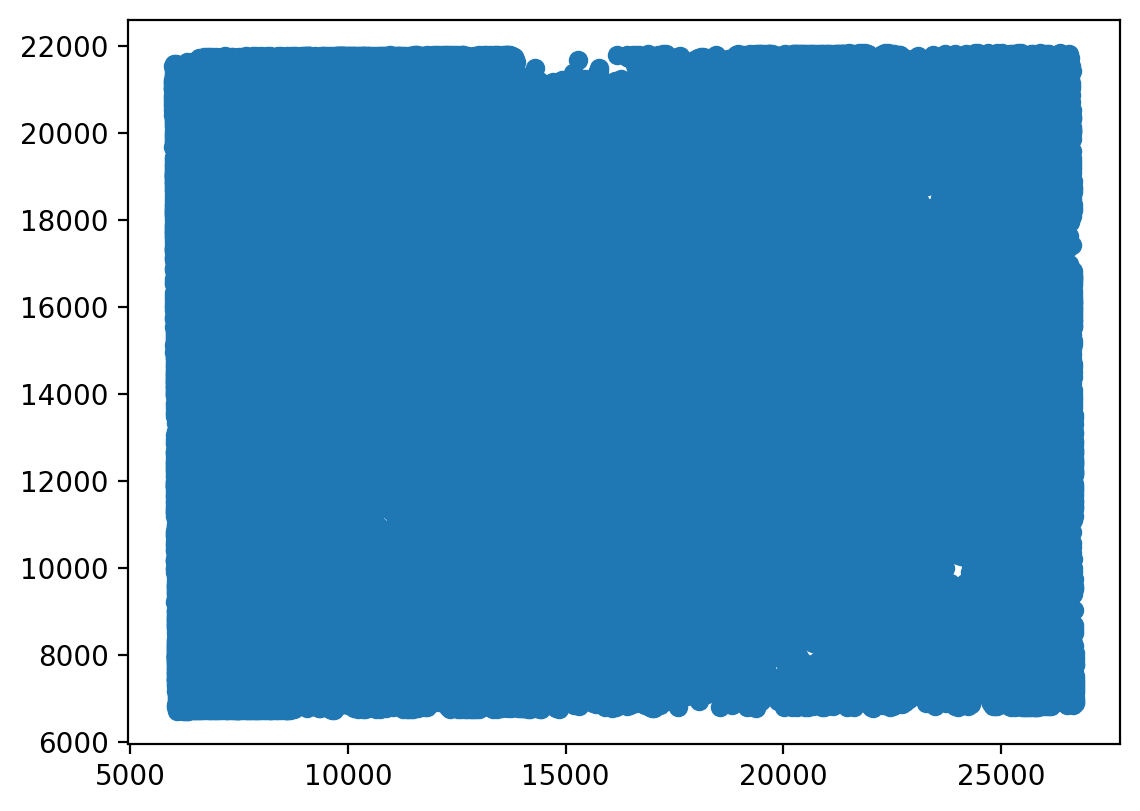

In [78]:
cells_gdf.plot()

In [211]:
# Perform spatial join
joined = gpd.sjoin(merged_gdf_no_clusters, cells_gdf, how='left', predicate='intersects')

In [150]:
joined

geometry         id   
692     POLYGON ((11405.232 13126.299, 11391.357 13162...     ID_693  \
715     POLYGON ((25911.901 21383.459, 25902.685 21355...     ID_716   
716     POLYGON ((25908.768 21342.425, 25921.776 21381...     ID_717   
1026    POLYGON ((13351.446 15436.455, 13347.807 15483...    ID_1027   
1027    POLYGON ((18093.856 17638.615, 17992.771 17740...    ID_1028   
...                                                   ...        ...   
216319  POLYGON ((10156.752 7978.409, 10135.094 7973.3...  ID_216320   
216320  POLYGON ((10164.904 7968.349, 10175.306 7954.0...  ID_216321   
216321  POLYGON ((10190.246 7999.567, 10223.306 7997.2...  ID_216322   
216322  POLYGON ((10189.105 8009.671, 10183.403 8013.2...  ID_216323   
216322  POLYGON ((10189.105 8009.671, 10183.403 8013.2...  ID_216323   

               area  index_right   cell_id   x_centroid   y_centroid   
692      358.596168      79985.0   79986.0  1964.694482  3145.534778  \
715      169.934073          NaN       NaN          NaN          NaN   
716      727.098199          NaN       NaN          NaN          NaN   
1026    1572.925412          NaN       NaN          NaN          NaN   
1027    2367.627624     113691.0  113692.0  4385.080688  1495.206653   
...             ...          ...       ...          ...          ...   
216319   937.223524      62495.0   62496.0  1493.463281  5016.326465   
216320   559.404545      62491.0   62492.0  1499.591956  5029.427173   
216321  1204.811269      62486.0   62487.0  1514.046521  5018.714185   
216322  2739.933121      62494.0   62495.0  1521.445422  5007.887061   
216322  2739.933121      62498.0   62499.0  1516.106152  4993.927637   

        transcript_counts  control_probe_counts  control_codeword_counts   
692                 136.0                   0.0                      0.0  \
715                   NaN                   NaN                      NaN   
716                   NaN                   NaN                      NaN   
1026                  NaN                   NaN                      NaN   
1027                396.0                   3.0                      1.0   
...                   ...                   ...                      ...   
216319              393.0                   0.0                      0.0   
216320              257.0                   0.0                      0.0   
216321              200.0                   0.0                      0.0   
216322              360.0                   0.0                      0.0   
216322              355.0                   1.0                      0.0   

        total_counts   cell_area  nucleus_area  x_location_transformed   
692            136.0   64.257344     20.546094            11406.215864  \
715              NaN         NaN           NaN                     NaN   
716              NaN         NaN           NaN                     NaN   
1026             NaN         NaN           NaN                     NaN   
1027           400.0  887.320312     20.410625            18035.080638   
...              ...         ...           ...                     ...   
216319         393.0  228.761562     87.016094            10136.373686   
216320         257.0  134.520469     68.185938            10153.390057   
216321         200.0   93.473438     35.944375            10192.966211   
216322         360.0  261.048281     56.129219            10213.152623   
216322         356.0  368.610469     36.757188            10198.293952   

        y_location_transformed  
692               13141.135335  
715                        NaN  
716                        NaN  
1026                       NaN  
1027              17708.471731  
...                        ...  
216319             7994.088869  
216320             7958.171585  
216321             7987.803291  
216322             8017.654151  
216322             8055.941666  

[148071 rows x 15 columns]

In [214]:
filtered_joined.to_file("../data/xenium/outs/clusters/joined.geojson", driver='GeoJSON')

In [215]:
filtered_joined

geometry         id   
692     POLYGON ((11403.576 13123.625, 11388.508 13163...     ID_693  \
1029    POLYGON ((10329.682 20453.726, 10296.116 20456...    ID_1030   
1030    POLYGON ((10239.900 20548.527, 10240.513 20547...    ID_1031   
1031    POLYGON ((10238.240 20487.158, 10283.632 20492...    ID_1032   
1032    POLYGON ((10245.228 20544.339, 10283.401 20531...    ID_1033   
...                                                   ...        ...   
216318  POLYGON ((10176.216 8010.964, 10154.480 7999.5...  ID_216319   
216319  POLYGON ((10160.232 7976.648, 10134.612 7970.7...  ID_216320   
216320  POLYGON ((10166.627 7970.231, 10178.410 7953.9...  ID_216321   
216321  POLYGON ((10188.873 8002.169, 10225.247 7999.6...  ID_216322   
216321  POLYGON ((10188.873 8002.169, 10225.247 7999.6...  ID_216322   

               area  index_right  cell_id   x_centroid   y_centroid   
692      630.960876        79985    79986  1964.694482  3145.534778  \
1029    1035.124137        43580    43581  1578.927606   477.011710   
1030    2690.321688        43886    43887  1543.763629   461.951187   
1031    1946.496306        43578    43579  1562.895581   478.018283   
1032    1745.230508        43574    43575  1561.307745   460.263950   
...             ...          ...      ...          ...          ...   
216318   681.177123        62496    62497  1502.337024  5007.781226   
216319  1273.334006        62495    62496  1493.463281  5016.326465   
216320   819.924526        62491    62492  1499.591956  5029.427173   
216321  1580.647927        62483    62484  1513.536646  5028.908789   
216321  1580.647927        62486    62487  1514.046521  5018.714185   

        transcript_counts  control_probe_counts  control_codeword_counts   
692                   136                     0                        0  \
1029                  362                     0                        0   
1030                  231                     0                        0   
1031                  560                     0                        0   
1032                  400                     0                        0   
...                   ...                   ...                      ...   
216318                253                     0                        0   
216319                393                     0                        0   
216320                257                     0                        0   
216321                468                     0                        0   
216321                200                     0                        0   

        total_counts   cell_area  nucleus_area  x_location_transformed   
692              136   64.257344     20.546094            11406.215864  \
1029             362  202.300000     92.028438            10310.436465   
1030             231  429.165000     34.092969            10213.607930   
1031             560  390.330625    119.980156            10266.395645   
1032             400  320.202969    115.464531            10261.794700   
...              ...         ...           ...                     ...   
216318           253  118.264219     52.381250            10160.643361   
216319           393  228.761562     87.016094            10136.373686   
216320           257  134.520469     68.185938            10153.390057   
216321           468  197.287656     98.079375            10191.701639   
216321           200   93.473438     35.944375            10192.966211   

        y_location_transformed  
692               13141.135335  
1029              20468.787008  
1030              20509.700855  
1031              20465.806373  
1032              20514.572130  
...                        ...  
216318             8017.689102  
216319             7994.088869  
216320             7958.171585  
216321             7959.782776  
216321             7987.803291  

[130090 rows x 15 columns]

In [213]:
filtered_joined = joined[~joined['index_right'].isna()]

In [216]:
unique_ids = filtered_joined['id'].unique()

In [217]:
filtered_adata.obs

sample       start_x       start_y         end_x         end_y   
bin                                                                            
(0, 1376)    sample1   5977.914968  19691.259132   5987.326733  19700.670896  \
(0, 1400)    sample1   5977.914968  19917.141485   5987.326733  19926.553249   
(0, 1402)    sample1   5977.914968  19935.965014   5987.326733  19945.376779   
(0, 1415)    sample1   5977.914968  20058.317955   5987.326733  20067.729720   
(0, 1425)    sample1   5977.914968  20152.435602   5987.326733  20161.847367   
...              ...           ...           ...           ...           ...   
(2201, 146)  sample1  26693.209086   8114.788543  26702.620851   8124.200308   
(2201, 147)  sample1  26693.209086   8124.200308  26702.620851   8133.612073   
(2201, 148)  sample1  26693.209086   8133.612073  26702.620851   8143.023838   
(2201, 153)  sample1  26693.209086   8180.670896  26702.620851   8190.082661   
(2201, 154)  sample1  26693.209086   8190.082661  26702.620851   8199.494426   

                 center_x      center_y  n_genes_by_counts   
bin                                                          
(0, 1376)     5982.620851  19695.965014                  1  \
(0, 1400)     5982.620851  19921.847367                  1   
(0, 1402)     5982.620851  19940.670896                  2   
(0, 1415)     5982.620851  20063.023838                  1   
(0, 1425)     5982.620851  20157.141485                  1   
...                   ...           ...                ...   
(2201, 146)  26697.914968   8119.494426                  2   
(2201, 147)  26697.914968   8128.906190                  1   
(2201, 148)  26697.914968   8138.317955                  1   
(2201, 153)  26697.914968   8185.376779                  1   
(2201, 154)  26697.914968   8194.788543                  1   

             log1p_n_genes_by_counts  total_counts  log1p_total_counts   
bin                                                                      
(0, 1376)                   0.693147             1            0.693147  \
(0, 1400)                   0.693147             1            0.693147   
(0, 1402)                   1.098612             2            1.098612   
(0, 1415)                   0.693147             1            0.693147   
(0, 1425)                   0.693147             1            0.693147   
...                              ...           ...                 ...   
(2201, 146)                 1.098612             2            1.098612   
(2201, 147)                 0.693147             1            0.693147   
(2201, 148)                 0.693147             1            0.693147   
(2201, 153)                 0.693147             1            0.693147   
(2201, 154)                 0.693147             1            0.693147   

             pct_counts_in_top_50_genes  pct_counts_in_top_100_genes   
bin                                                                    
(0, 1376)                         100.0                        100.0  \
(0, 1400)                         100.0                        100.0   
(0, 1402)                         100.0                        100.0   
(0, 1415)                         100.0                        100.0   
(0, 1425)                         100.0                        100.0   
...                                 ...                          ...   
(2201, 146)                       100.0                        100.0   
(2201, 147)                       100.0                        100.0   
(2201, 148)                       100.0                        100.0   
(2201, 153)                       100.0                        100.0   
(2201, 154)                       100.0                        100.0   

             pct_counts_in_top_200_genes  pct_counts_in_top_500_genes   
bin                                                                     
(0, 1376)                          100.0                        100.0  \
(0, 1400)                          100.0       

In [218]:

indices_to_keep = filtered_adata.obs['id'].isin(unique_ids)

# Filter the entire AnnData object
filtered_adata2 = filtered_adata[indices_to_keep].copy()

In [219]:
filtered_adata2.obs

sample       start_x       start_y         end_x         end_y   
bin                                                                            
(0, 1376)    sample1   5977.914968  19691.259132   5987.326733  19700.670896  \
(0, 1400)    sample1   5977.914968  19917.141485   5987.326733  19926.553249   
(0, 1457)    sample1   5977.914968  20453.612073   5987.326733  20463.023838   
(0, 1463)    sample1   5977.914968  20510.082661   5987.326733  20519.494426   
(0, 1465)    sample1   5977.914968  20528.906190   5987.326733  20538.317955   
...              ...           ...           ...           ...           ...   
(2201, 122)  sample1  26693.209086   7888.906190  26702.620851   7898.317955   
(2201, 123)  sample1  26693.209086   7898.317955  26702.620851   7907.729720   
(2201, 124)  sample1  26693.209086   7907.729720  26702.620851   7917.141485   
(2201, 126)  sample1  26693.209086   7926.553249  26702.620851   7935.965014   
(2201, 128)  sample1  26693.209086   7945.376779  26702.620851   7954.788543   

                 center_x      center_y  n_genes_by_counts   
bin                                                          
(0, 1376)     5982.620851  19695.965014                  1  \
(0, 1400)     5982.620851  19921.847367                  1   
(0, 1457)     5982.620851  20458.317955                  1   
(0, 1463)     5982.620851  20514.788543                  4   
(0, 1465)     5982.620851  20533.612073                  1   
...                   ...           ...                ...   
(2201, 122)  26697.914968   7893.612073                  1   
(2201, 123)  26697.914968   7903.023838                  1   
(2201, 124)  26697.914968   7912.435602                  1   
(2201, 126)  26697.914968   7931.259132                  1   
(2201, 128)  26697.914968   7950.082661                  1   

             log1p_n_genes_by_counts  total_counts  log1p_total_counts   
bin                                                                      
(0, 1376)                   0.693147             1            0.693147  \
(0, 1400)                   0.693147             1            0.693147   
(0, 1457)                   0.693147             1            0.693147   
(0, 1463)                   1.609438             4            1.609438   
(0, 1465)                   0.693147             1            0.693147   
...                              ...           ...                 ...   
(2201, 122)                 0.693147             1            0.693147   
(2201, 123)                 0.693147             1            0.693147   
(2201, 124)                 0.693147             1            0.693147   
(2201, 126)                 0.693147             1            0.693147   
(2201, 128)                 0.693147             1            0.693147   

             pct_counts_in_top_50_genes  pct_counts_in_top_100_genes   
bin                                                                    
(0, 1376)                         100.0                        100.0  \
(0, 1400)                         100.0                        100.0   
(0, 1457)                         100.0                        100.0   
(0, 1463)                         100.0                        100.0   
(0, 1465)                         100.0                        100.0   
...                                 ...                          ...   
(2201, 122)                       100.0                        100.0   
(2201, 123)                       100.0                        100.0   
(2201, 124)                       100.0                        100.0   
(2201, 126)                       100.0                        100.0   
(2201, 128)                       100.0                        100.0   

             pct_counts_in_top_200_genes  pct_counts_in_top_500_genes   
bin                                                                     
(0, 1376)                          100.0                        100.0  \
(0, 1400)                          100.0       

In [220]:
filtered_adata2

AnnData object with n_obs × n_vars = 1265844 × 541
    obs: 'sample', 'start_x', 'start_y', 'end_x', 'end_y', 'center_x', 'center_y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'index', 'geometry', 'id', 'is_within_polygon', 'is_not_in_an_polygon_overlap'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'end_x', 'end_y', 'spatial', 'start_x', 'start_y'

In [221]:
groupby_object = filtered_adata2.obs.groupby(['id'], observed=True)

In [222]:
import numpy as np

def get_min_max_ids_numpy(id_dict):
    # Convert all arrays to a single flat array
    all_ids = np.concatenate(list(id_dict.values()))
    
    # Find the min and max
    min_id = np.min(all_ids)
    max_id = np.max(all_ids)
    
    return min_id, max_id


min_id, max_id = get_min_max_ids_numpy(groupby_object.indices)
print("Min ID:", min_id)
print("Max ID:", max_id)


Min ID: 0
Max ID: 1265843


In [223]:
filtered_adata2.obs

sample       start_x       start_y         end_x         end_y   
bin                                                                            
(0, 1376)    sample1   5977.914968  19691.259132   5987.326733  19700.670896  \
(0, 1400)    sample1   5977.914968  19917.141485   5987.326733  19926.553249   
(0, 1457)    sample1   5977.914968  20453.612073   5987.326733  20463.023838   
(0, 1463)    sample1   5977.914968  20510.082661   5987.326733  20519.494426   
(0, 1465)    sample1   5977.914968  20528.906190   5987.326733  20538.317955   
...              ...           ...           ...           ...           ...   
(2201, 122)  sample1  26693.209086   7888.906190  26702.620851   7898.317955   
(2201, 123)  sample1  26693.209086   7898.317955  26702.620851   7907.729720   
(2201, 124)  sample1  26693.209086   7907.729720  26702.620851   7917.141485   
(2201, 126)  sample1  26693.209086   7926.553249  26702.620851   7935.965014   
(2201, 128)  sample1  26693.209086   7945.376779  26702.620851   7954.788543   

                 center_x      center_y  n_genes_by_counts   
bin                                                          
(0, 1376)     5982.620851  19695.965014                  1  \
(0, 1400)     5982.620851  19921.847367                  1   
(0, 1457)     5982.620851  20458.317955                  1   
(0, 1463)     5982.620851  20514.788543                  4   
(0, 1465)     5982.620851  20533.612073                  1   
...                   ...           ...                ...   
(2201, 122)  26697.914968   7893.612073                  1   
(2201, 123)  26697.914968   7903.023838                  1   
(2201, 124)  26697.914968   7912.435602                  1   
(2201, 126)  26697.914968   7931.259132                  1   
(2201, 128)  26697.914968   7950.082661                  1   

             log1p_n_genes_by_counts  total_counts  log1p_total_counts   
bin                                                                      
(0, 1376)                   0.693147             1            0.693147  \
(0, 1400)                   0.693147             1            0.693147   
(0, 1457)                   0.693147             1            0.693147   
(0, 1463)                   1.609438             4            1.609438   
(0, 1465)                   0.693147             1            0.693147   
...                              ...           ...                 ...   
(2201, 122)                 0.693147             1            0.693147   
(2201, 123)                 0.693147             1            0.693147   
(2201, 124)                 0.693147             1            0.693147   
(2201, 126)                 0.693147             1            0.693147   
(2201, 128)                 0.693147             1            0.693147   

             pct_counts_in_top_50_genes  pct_counts_in_top_100_genes   
bin                                                                    
(0, 1376)                         100.0                        100.0  \
(0, 1400)                         100.0                        100.0   
(0, 1457)                         100.0                        100.0   
(0, 1463)                         100.0                        100.0   
(0, 1465)                         100.0                        100.0   
...                                 ...                          ...   
(2201, 122)                       100.0                        100.0   
(2201, 123)                       100.0                        100.0   
(2201, 124)                       100.0                        100.0   
(2201, 126)                       100.0                        100.0   
(2201, 128)                       100.0                        100.0   

             pct_counts_in_top_200_genes  pct_counts_in_top_500_genes   
bin                                                                     
(0, 1376)                          100.0                        100.0  \
(0, 1400)                          100.0       

In [224]:
# Extract the gene expression counts from the AnnData object
counts = filtered_adata2.X

# Obtain the number of unique nuclei and the number of genes in the expression data
N_groups = groupby_object.ngroups
N_genes = counts.shape[1]

# Initialize a sparse matrix to store the summed gene counts for each nucleus
summed_counts = sparse.lil_matrix((N_groups, N_genes))

# Lists to store the IDs of polygons and the current row index
polygon_id = []
row = 0

# Iterate over each unique polygon to calculate the sum of gene counts.
for polygons, idx_ in groupby_object.indices.items():
    summed_counts[row] = counts[idx_].sum(0)
    row += 1
    polygon_id.append(polygons)

# Create and AnnData object from the summed count matrix
summed_counts = summed_counts.tocsr()
grouped_filtered_adata2 = anndata.AnnData(X=summed_counts,obs=pd.DataFrame(polygon_id,columns=['id'],index=polygon_id),var=filtered_adata2.var)

%store grouped_filtered_adata2


Stored 'grouped_filtered_adata2' (AnnData)


In [225]:
grouped_filtered_adata2

AnnData object with n_obs × n_vars = 112844 × 541
    obs: 'id'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [226]:
#this you need to save with a meaningfull name
grouped_filtered_adata2.write("../data/xenium/grouped_filtered_voronoi_adata_second_attempt_buffered.h5ad")

##WENT TILL HERE

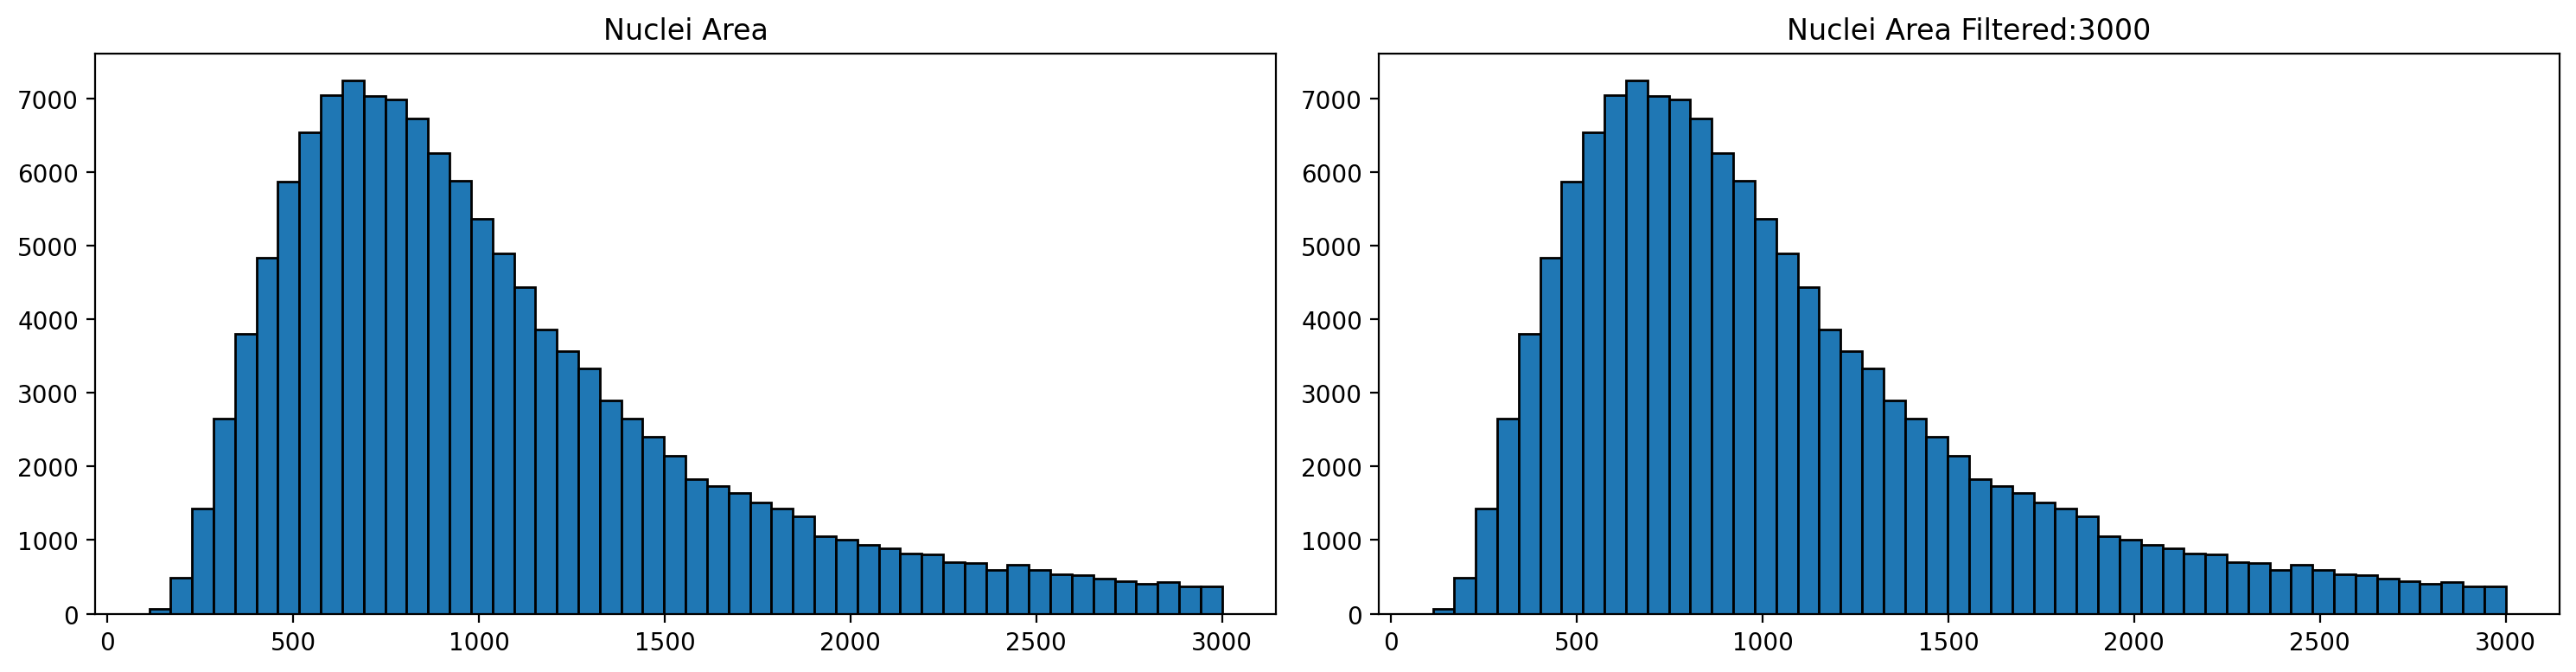

In [227]:
import sys
sys.path.append('../src/utils')
import os

import importlib
import image_plot_utils

# Reload the module
importlib.reload(image_plot_utils)

# Now try importing the function again
from image_plot_utils import plot_nuclei_area

# Store the area of each nucleus in the GeoDataframe
filtered_joined['area'] = filtered_joined['geometry'].area

# Calculate quality control metrics for the original AnnData object
sc.pp.calculate_qc_metrics(grouped_filtered_adata2, inplace=True)

# Plot the nuclei area distribution before and after filtering
plot_nuclei_area(gdf=filtered_joined,area_cut_off=3000)

In [228]:
# Create a mask based on the 'id' column for values present in 'gdf' with 'area' less than 500
mask_area = grouped_filtered_adata2.obs['id'].isin(gdf[(gdf['area'] < 3000)].id)

# Create a mask based on the 'total_counts' column for values greater than 100
#ask_count = grouped_filtered_adata.obs['total_counts'] > 100

# Apply both masks to the original AnnData to create a new filtered AnnData object
count_area_filtered_adata2 = grouped_filtered_adata2[mask_area, :]

# Calculate quality control metrics for the filtered AnnData object
sc.pp.calculate_qc_metrics(count_area_filtered_adata2, inplace=True)


_qc.py (141): Trying to modify attribute `.obs` of view, initializing view as actual.


In [229]:
 # Normalize total counts for each cell in the AnnData object
sc.pp.normalize_total(count_area_filtered_adata2, inplace=True)

# Logarithmize the values in the AnnData object after normalization
sc.pp.log1p(count_area_filtered_adata2)

# Identify highly variable genes in the dataset using the Seurat method
sc.pp.highly_variable_genes(count_area_filtered_adata2, flavor="seurat", n_top_genes=2000)

# Perform Principal Component Analysis (PCA) on the AnnData object
sc.pp.pca(count_area_filtered_adata2)

# Build a neighborhood graph based on PCA components
sc.pp.neighbors(count_area_filtered_adata2)

# Perform Leiden clustering on the neighborhood graph and store the results in 'clusters' column

# Adjust the resolution parameter as needed for different samples
sc.tl.leiden(count_area_filtered_adata2, resolution=0.4, key_added="clusters")


_index.py (146): Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.


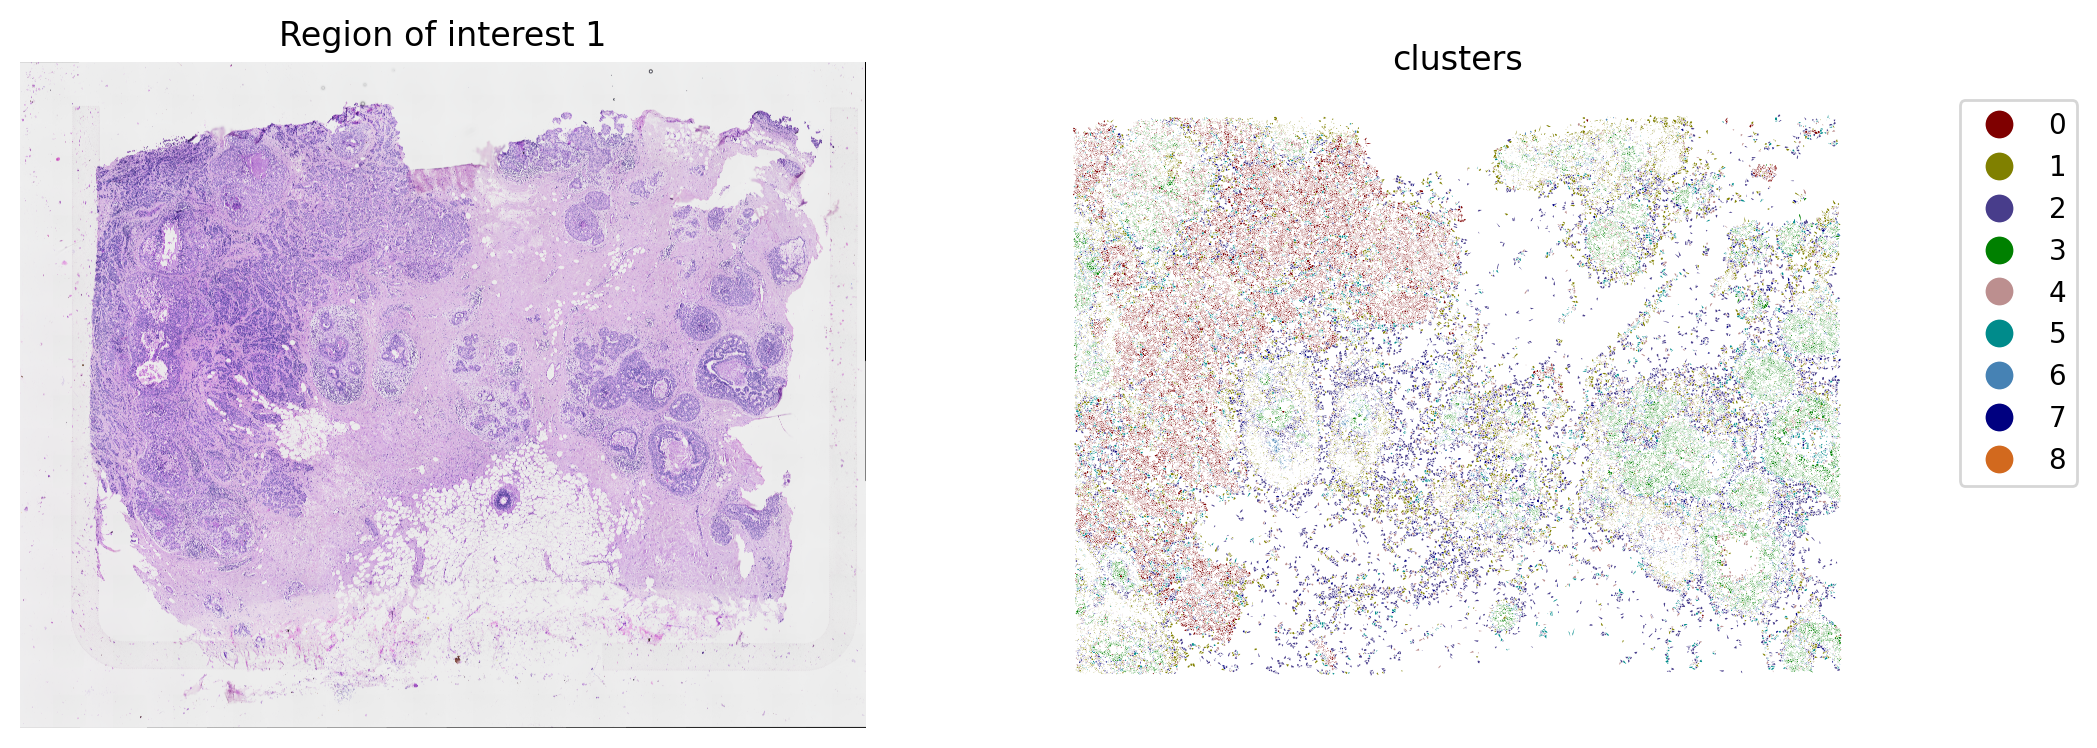

In [100]:
from image_plot_utils import plot_clusters_and_save_image
importlib.reload(image_plot_utils)
# Plot and save the clustering results
plot_clusters_and_save_image(title="Region of interest 1", gdf=filtered_joined, img=img, adata=count_area_filtered_adata2, color_by_obs='clusters', output_name="image_clustering.ROI1.tiff")

In [230]:
filtered_joined.to_file("../data/xenium/outs/clusters/data_cells_voronoi2_buffered.geojson", driver='GeoJSON')